In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# 0. Initial Attempts to Understand Change

Previously, we looked at [functions](https://github.com/contently/math_class/blob/master/functions.ipynb), or _mappings_ that projected inputs to outputs, and we looked at them over a range of values, getting an intuitive feel for curve shape or growth.

Often times, in the real world, we need more than just a rough sense of how something changes - we really need to _know_. And even if it's just a high-level sense that we need, we want to have at least some idea of _why_ something has the shape that it does.

Let's start with our first function from last time:

In [3]:
def am_i_hungry(num_calories_past_hour):
    # just return one, no matter the value of num_calories_past_hour,
    # because I'm always hungry :)
    return 1

How could we come to a sense of how this function changes?

We could do, maybe, one of two things:
- look at the function for insight
- look at a range of the function's values for insight

In this case, if we look at `am_i_hungry`, all it does is return 1, _no matter the input_. So, this function, as we know, _does not change_, and we can reach the same conclusion through visually inspecting its output. 

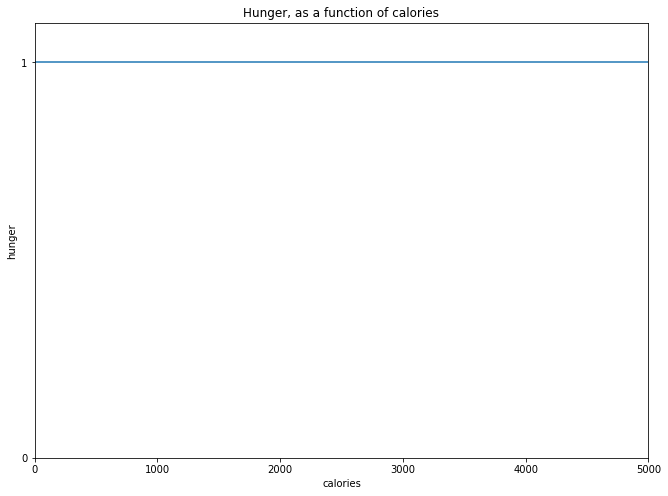

In [4]:
fig = plt.figure(figsize=(11, 8))

# create array of calorie values evenly spaced between 0 and 5000
calories = np.linspace(0, 5000)

# for each calorie value, return am_i_hungry of that value and 
# retain that value in the hunger list
hunger = []
for c in calories:
    hunger.append(am_i_hungry(c))

# plot where x is calories and y is hunger
plot = plt.plot(calories, hunger)

xlab = fig.axes[0].set_xlim(0, 5000)

ylab = fig.axes[0].set_ylim(0, 1.1)
ylab = fig.axes[0].set_yticks([0, 1])

xlab = fig.axes[0].set_xlabel("calories")
ylab = fig.axes[0].set_ylabel("hunger")

title = plt.title("Hunger, as a function of calories")

---

Next, let's look at our taxi cab function and try to perform a similar analysis:

In [6]:
def estimate_taxi_cost(distance):
    # $2.50 initial fee + $.50 for every mile
    estimated_cost = 2.5 + .5 * distance
    return estimated_cost

Inspecting our function, we see here that, no matter the distance, we're paying a \\$2.50 flat fee. Next, we see that we will pay an additional \\$.50 for every mile we travel. 

What does this tell us? That:
- unlike `am_i_hungry`, `estimate_taxi_cost` is _not_ constant
- its value changes by $.50 for every mile
- the the increase in cost based on miles travelled is _proportionate_ to the number of miles travelled
- this describes what's known as a _linear_ relationship

Now, let's vlizualize this function:

In [56]:
def plot_taxi():
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    distances = np.linspace(0, 10)

    costs = []
    for d in distances:
        costs.append(estimate_taxi_cost(d))

    plot = plt.plot(distances, costs)

    xlab = fig.axes[0].set_xlim(0, 10)

    xlab = fig.axes[0].set_xlabel("distance")
    ylab = fig.axes[0].set_ylabel("estimated cost")

    title = plt.title("Estimated taxi fare, as a function of distance")
    
    return ax

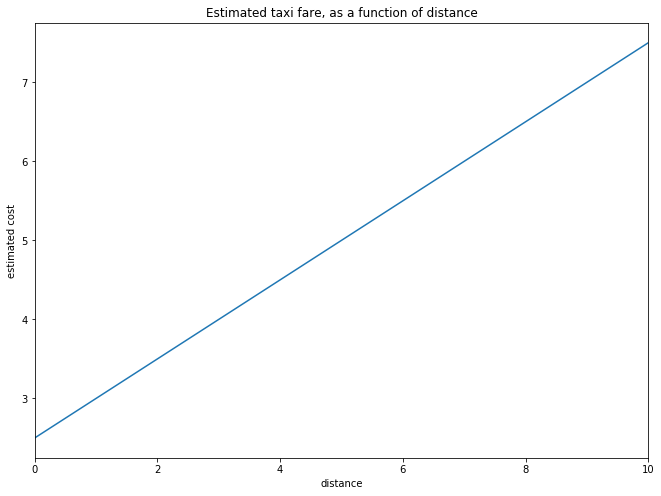

In [58]:
ax = plot_taxi()

We can see here that our function has a _y-intercept_ of 2.5 (the flat fee to start a fare) and is increasing over this domain in a straight line. Let's try to precisely verify that .5 is our rate of change.

We can do this through calculating the _ratio_ of changes in $y$ (sometimes referred to as _delta y_) to changes in $x$ (sometimes referred to as _delta x_). We'll pick an example $x$ range, and see what $y$ does over these values.

In [76]:
print("f(3):", estimate_taxi_cost(3), "-> f(7):", estimate_taxi_cost(7))

f(3): 4.0 -> f(7): 6.0


So we go from (3, 4) to (7, 6) ... we can see that $x$ is growing more quickly than $y$, so we know we have a rate of change (of $y$ with respect to $x$) of less than 1.

We can write a function to plot _delta x_ and _delta y_ over our existing taxi plot:

In [107]:
def add_line_to_plot(ax, func, x1, x2, diagonal=None, color="black", opacity=1):
    y1 = func(x1)
    y2 = func(x2)
    
    delta_x = ax.hlines(y=y1, xmin=x1, xmax=x2, linestyle="--", color=color, alpha=opacity)
    delta_y = ax.vlines(x=x2, ymin=y1, ymax=y2, linestyle="--", color=color, alpha=opacity)
    
    if diagonal:
        diag = ax.plot(np.linspace(x1, x2), np.linspace(y1, y2), linestyle="--", color=color, alpha=opacity)

    return ax

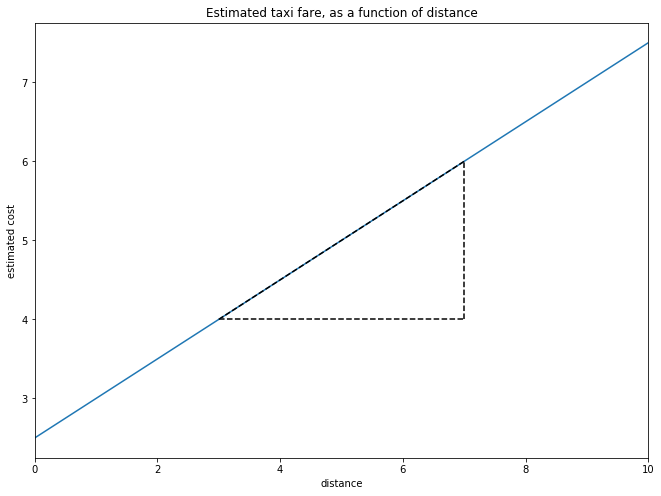

In [111]:
taxi_ax = add_line_to_plot(ax=plot_taxi(), func=estimate_taxi_cost, x1=3, x2=7, diagonal=True)

We can see clearly that $x$ changes more than $y$. If we divide _delta y_, which is:
- $6 - 4 = 2$

by _delta x_, which is:
- $7 - 3 = 4$

we get:
- $\large \frac 4 2 = \small .5$

as the _slope_ for this function.

Note here that the _hypotenous_, or diagonal, of the _right_ triangle whose bottom and side are _delta x_ and _delta y_, respectively, perfectly tracks our function's values, thus visually confirming our function's linearity.

---

Now, let's move on to something a bit more interesting ... remember our function for calculating the distance an apple will fall based on how long it's in the air for?

In [19]:
def distance_fell(time_in_air):
    # based on initial velocity of 0...
    # gravitational acceleration is -9.81 (m / s^2)
    # we are ignoring air resistance & terminal velocity
    return 9.8 * (time_in_air) ** 2

In [200]:
def plot_apple():
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    times_in_air = np.linspace(0, 10)

    distances = []
    for t in times_in_air:
        distances.append(distance_fell(t))

    plot = plt.plot(times_in_air, distances)

    xlim = fig.axes[0].set_xlim(0, 10)

    xlab = fig.axes[0].set_xlabel("time in air (seconds)")
    ylab = fig.axes[0].set_ylabel("distance fell (meters)")

    title = plt.title("Estimated distance fallen by apple based on time in air")
    
    return ax

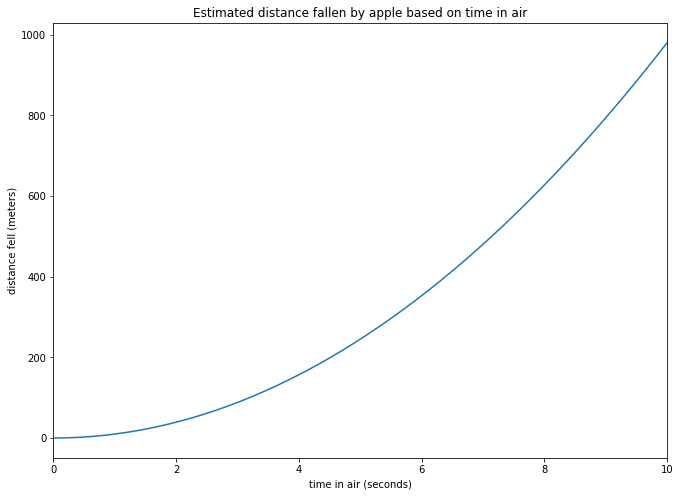

In [119]:
ax = plot_apple()

How would we understand how _this_ function changes, given the fact that, at least visually, its ouput doesn't follow a straight line? 

Let's start by plotting another _delta x, delta y_ triangle over the same domain, $[3, 7]$.

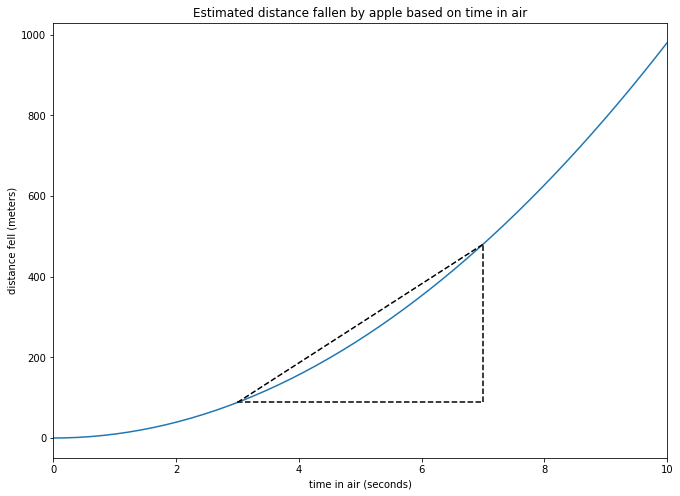

In [120]:
apple_ax = add_line_to_plot(ax=plot_apple(), func=distance_fell, x1=3, x2=7, diagonal=True)

We can see clearly a couple of major differences between this plot and the plot for our taxi cab function, even just focusing on our _delta x_ / _delta y_ triangle, which has the same domain ($[3, 7]$) as before.

- _delta y_ is *much* greater - just look at the _y-axis_
- our traingle's hypotenous _does not_ track $f(x)$, which means this is a _non-linear_ function

For reference, this is how $y$ changes over this domain:

In [172]:
distance_fell(3)

88.2

In [173]:
distance_fell(7)

480.20000000000005

So, we can see that our line doesn't fit the curve, but let's take a quick look at _exactly_ how off it is:

In [174]:
(480 - 88) / 4

98.0

In [175]:
9.8 * 2 * (4)

78.4

If we go back and look at the definition for our function, `distance_fell`, we can see that we're returning, if _t_ is time in air (in seconds):
- $9.81 \cdot t^2 \space (\frac {m}{s^2})$

It's that squared (or to-the-power-of-2) term that's screwing everything up! Why? Because ... let's start by thinking back to our taxi function - we know that, for every additional mile we travel, we're going to pay an additional $.50. Our cost increases are proportionate to the number of miles we travel, which makes that a linear relationship.

But with this function, the distance changes are proportionate to the time in air, proportionate to the time in the air. So, what our distance is proportionate to will actually grow as the time in air grows, if that makes sense? In other words, not only is our function not constant, the way this function _changes_ is also not constant.

# 1. From _Secant_ to _Tangent_

What we've done above is to generate what's known as a _secant_ line - this is just another name for the hypotenous of our _delta y_ / _delta x_ triangle.

Can we even use this methodology on non-linear functions? If so, how can we make our secant line fit this curve better? Here's an idea: what if we make our _delta y_ / _delta x_ triangles smaller?

In [116]:
def add_multiple_lines(ax, func, x1_x2_pairs, diagonal=True, color="black", opacity_gradient=True):
    
    if opacity_gradient is True:
        opacities = np.linspace(.25, 1, num=len(x1_x2_pairs))
    
    for i, (x1, x2) in enumerate(x1_x2_pairs):
        new_ax = add_line_to_plot(ax, func, x1, x2, diagonal=True, color=color, opacity=opacities[i])

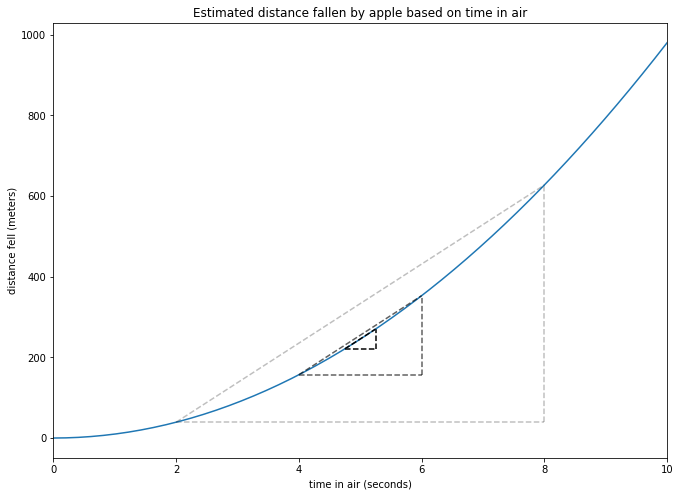

In [121]:
add_multiple_lines(plot_apple(), distance_fell, ((2, 8), (4, 6), (4.75, 5.25)))

We can see that, as our triangles get smaller, their hypotenouses come closer to tracking our curve ... how interesting! 

So, philosophically, this is a cool example of the capability we have to learn new things through reapplying what we already know in, maybe, just slightly different ways. But, more technically, what does this mean?

If we allow the secant line to become _infinitessimally_ small (that is, we allow it to reach a theoretical size such that it is non-zero but so small that it can't even be measured) then it will eventually reach a point at which it is just glancing, or _tangential_ to, $f(x)$ - we call the result of this shrinking the _tangent_ line.

Previously, we calculated change as:
- $\large \frac{\Delta y}{\Delta x} = \large \frac{f(x + h) - f(x)}{(x + h) - (x)}$

Where the triangles represent _delta_, or change. Theoretically, we have calculated the _exact_ slope, or instantaneous rate of change of $f(x)$ with respect to $x$, when $h$ is infinitessimally small - this result is known as the _differential_, or _derivative_ and is represented symbolically by:
- $\large \frac{d f(x)}{d x}$

For practical purposes, we can approximate a derivative in a variety of ways, including through using the above formula for $\large \frac{\Delta y}{\Delta x}$ with a very small value of $h$.

# 2. Basic Derivative Rules

Often times, in the real world, you'll have to approximate a function's derivative.

But often times, you _don't_ have to approximate what the derivate is, because you can _know_. How? Becuase there are rules. There are a number of rules, in fact, but these 4 rules should help get you going:

---

### Constant Rule

If
- $f(x) = c$

then
- $\large \frac{df(x)}{dx} = \small 0$

---

### Power Rule

If
- $f(x) = x^{n}$

then
- $\large \frac{df(x)}{dx} \small = n\cdot x^{(n-1)}$

---

### Sum Rule

If
- $f(x) = g(x) + h(x)$

then
- $\large \frac{df(x)}{dx} = \frac{dg(x)}{dx} \small + \large \frac{dh(x)}{dx}$

---

### Product Rule

If
- $f(x) = g(x)\cdot h(x)$

then
- $\large \frac{df(x)}{dx} \small = \large \frac{dh(x)}{dx} \small \cdot g(x) + \large \frac{dg(x)}{dx}  \small \cdot h(x)$

---

See more [here](https://www.math.ucdavis.edu/~kouba/Math17BHWDIRECTORY/Derivatives.pdf).

---

### How do _our_ functions change?

Please calculate the derivates for:
- `am_i_hungry`
- `estimate_taxi_cost`
- `distance_fell`

---

**`am_i_hungry`**
- $f(x) = 1$

Therefore, by the _constant_ rule:
- $\large \frac{df(x)}{dx} \small = 0$

---

**`estimate_taxi_cost`**
- $f(x) = 2.5 + .5x$

First, we look to the _sum_ rule:

- $\large \frac{df(x)}{dx} = \frac{d g(x)}{dx} \small + \large \frac{d h(x)}{dx}$

where, in this case:
- $g(x) = 2.5$
- $h(x) = .5x$

Next, we look to the _constant_ rule for $g(x)$, to see that its derivative is $0$.

If we look at $h(x)$, we see that it's actually the product of two functions, one whose value is always equal to $.5$, and one whose value is always equal to $x$.  So to find the derivative of $h(x)$, we look to the _product_ rule:
- $\large \frac{d}{dx} \small (.5 x) = \large \frac{d}{dx} \small (.5)(x) + \large \frac{d}{dx} \small (x)(.5) = 0 (x) + (1)(.5) = .5$

---

**`distance_fell`**
- $f(t) =9.8 * t^2$

First, we look to the _product_ rule:
- $\large \frac{d}{dt} \small (9.8 * t^2) = \large \frac{d}{dt} \small (9.8)(t^2) + \large \frac{d}{dt} \small (t^2)(9.8) = 0 (t^2) + (?)(9.8)$

So, we need to figure out $\large \frac{d}{dt} \small (t^2)$. For this, we can turn to the _power_ rule:
- $\large \frac{d}{dt} \small (t^2) = (2) \cdot t^{2 - 1} = 2 \cdot t$

Finally, plugging our result for $\large \frac{d}{dt} \small (t^2)$ in for $?$ in $(?)(9.8)$ yields:
- $2 \cdot (9.8) \cdot t = 19.6 \cdot t$

# 3. Using Derivatives

Write a function to approximate the square root of a passed number. How do we do this? Using something called *[Newton-Raphson's Method](https://en.wikipedia.org/wiki/Newton%27s_method)* (or, for short, Newton's Method). Let's start by looking the following plot:

In [266]:
def plot_x_squared(minus=0):
    fig = plt.figure(figsize=(11, 8))
    ax = fig.subplots(1)

    x = np.linspace(-5, 5)

    plot = plt.plot(x, np.square(x - minus))

    xlab = fig.axes[0].set_xlabel("x")
    ylab = fig.axes[0].set_ylabel("x squared")
    
    xorigin = plt.axvline(color="black", linestyle="--", linewidth=1)
    yorigin = plt.axhline(color="black", linestyle="--", linewidth=1)

    title = plt.title("x vs. x squared")
    
    return ax

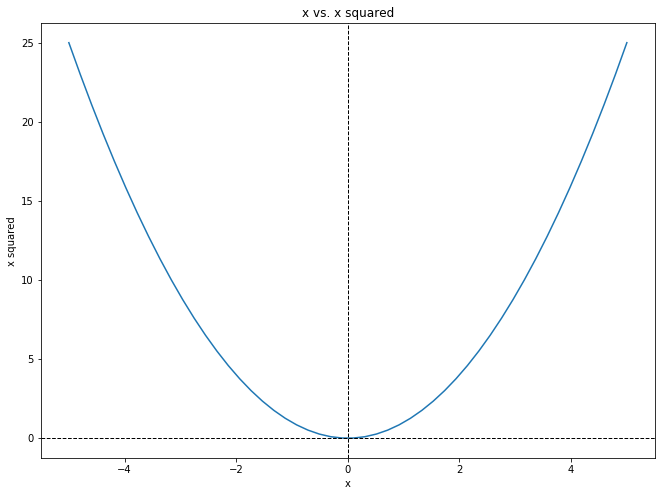

In [267]:
ax = plot_x_squared()

Here, we've plotted $f(x) = x^2$ on the interval $x=[-5, 5]$. We see that, at $x = 0$, $x^2 = 0$ ... unsurprising, right? But maybe more interestingly, we can use this observation to solve for, say, the value of x that yields 4 when squared. How, you ask?

Solving for the value of $x$ that, when squared, is equal to $4$, seems easy, becuase we all know that $2^2 = 4$. But what if we wanted $x$ given that $x^2 = 5$? 

Here's a useful piece of information: if $x^2 = 5$, then $x^2 - 5 = 0$. Why's this information useful? Let's look at the above plot again - what do we see as we approach, from either side, $x=0$? We see the line _slowing down_. I.e. it's derivative, which on either side of 

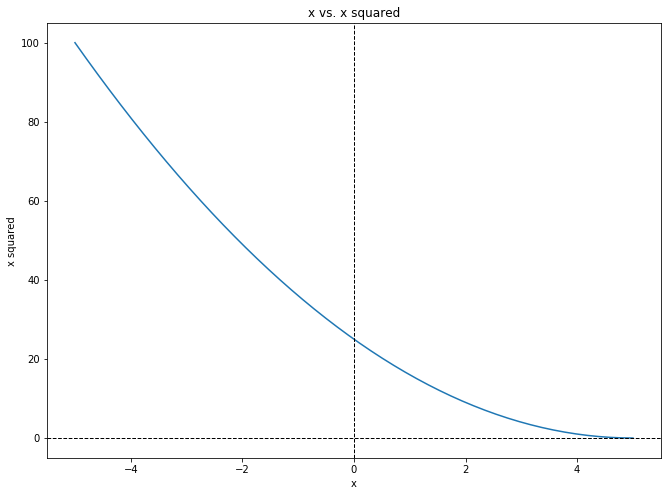

In [268]:
ax = plot_x_squared(5)

In [ ]:
Newton's method idea...

You start with an initial, somewhere-in-the-neighborhood guess 
then you iteratively adjust the guess based on the derivative - you scale the function's output by the slope

In [249]:
def newton_raphson(func, func_prime, guess, eps, print_guess=False):

    while abs(func(guess)) >= eps:
        if print_guess:
            print(guess)

        guess -= func(guess) / func_prime(guess, eps)

    return guess

In [250]:
def approx_deriv(func):

    def differentiate(x, eps):    
        h = x * eps
        return (func(x + h) - func(x - h)) / (2 * h)
    
    return differentiate

In [251]:
def find_roots_univariate(func, eps, print_guess=False):
    return newton_raphson(func, approx_deriv(func), - (func(0) / 2), eps, print_guess=print_guess)

In [252]:
def nth_root(n, num, eps=None, print_guess=False):
    if eps is None:
        eps = num / 10000
    
    return find_roots_univariate(lambda x: x ** n - num, eps, print_guess=print_guess)

In [253]:
def sqrt(num, eps=None, print_guess=False):
    return nth_root(2, num, eps, print_guess=print_guess)

In [254]:
sqrt(4)

2.0

In [255]:
sqrt(8)

2.8284313725490198

In [256]:
sqrt(81)

9.000009415515175

In [259]:
sqrt(81, .00000000001, print_guess=True)

40.5
21.25014465661836
12.530964025096305
9.497474257677318
9.01302855622617
9.000009455997992
9.000000000079197


8.999999999999998